# 01 - Processamento Digital de Imagens - Operações básicas

## Importar Bibliotecas

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

## Funções auxiliares

In [2]:
# Exibir imagens
def show_image(title, image, cmap = None):
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap = cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

## Carregar imagem com OpenCV

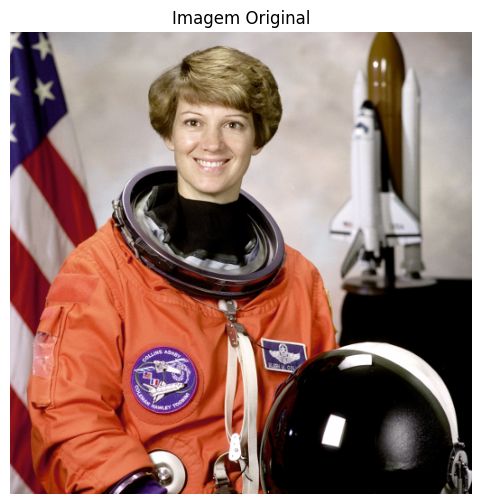

In [3]:
image_astronaut = skimage.data.astronaut()
show_image('Imagem Original', image_astronaut)

## Converter para escala de cinza

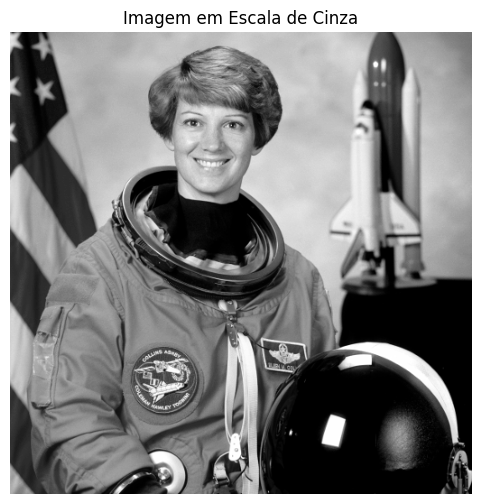

In [4]:
gray_image_astronaut = cv2.cvtColor(image_astronaut, cv2.COLOR_RGB2GRAY)
show_image('Imagem em Escala de Cinza', gray_image_astronaut, "gray")

## Redimensionamento

Shape imagem original: (512, 512, 3)
Shape imagem redimensionada: (300, 300, 3)


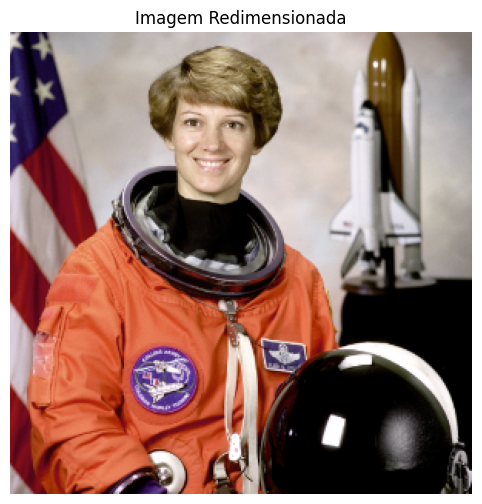

In [5]:
resized_image_astronaut = cv2.resize(image_astronaut, (300, 300))  # Novo tamanho: 300x300 pixels
print("Shape imagem original:", image_astronaut.shape)
print("Shape imagem redimensionada:", resized_image_astronaut.shape)
show_image('Imagem Redimensionada', resized_image_astronaut)

## Cortar a imagem

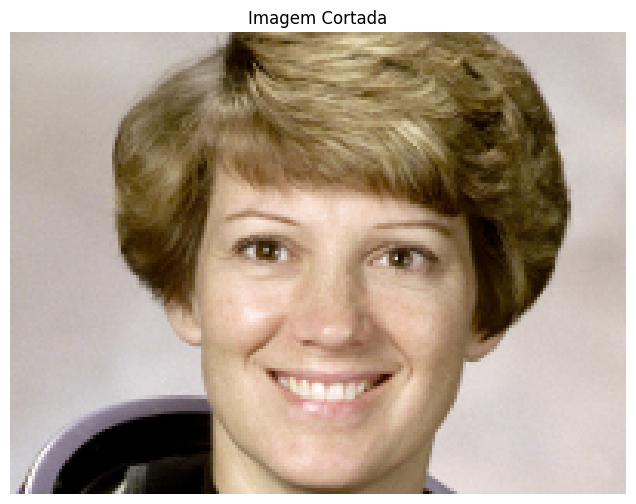

In [6]:
cropped_image_astronaut = image_astronaut[30:180, 120:320]
show_image('Imagem Cortada', cropped_image_astronaut)

## Rotacionar a imagem

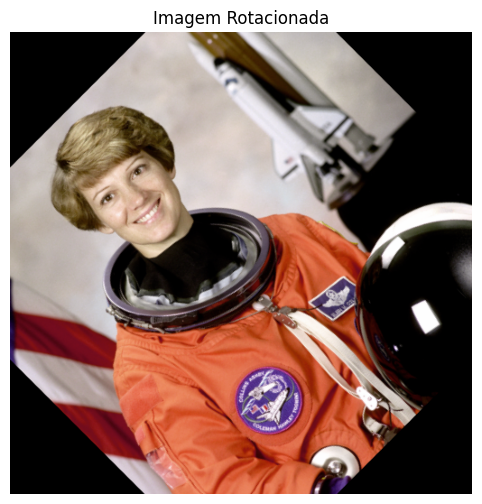

In [7]:
(h, w) = image_astronaut.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)  # Rotação de 45 graus
rotated_image_astronaut = cv2.warpAffine(image_astronaut, M, (w, h))
show_image('Imagem Rotacionada', rotated_image_astronaut)

## Borrar a imagem

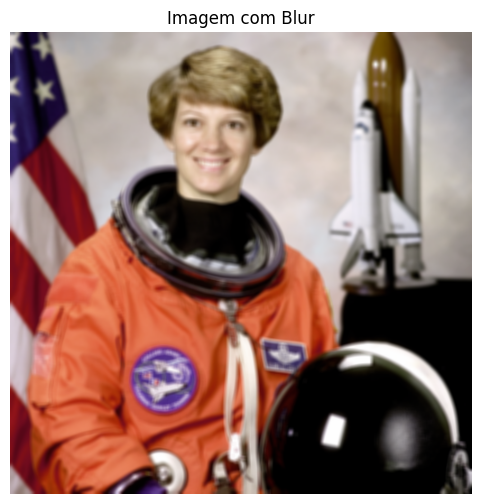

In [8]:
blurred_image_astronaut = cv2.blur(image_astronaut, (5, 5))
show_image('Imagem com Blur', blurred_image_astronaut)

## Detecção de bordas (Canny)

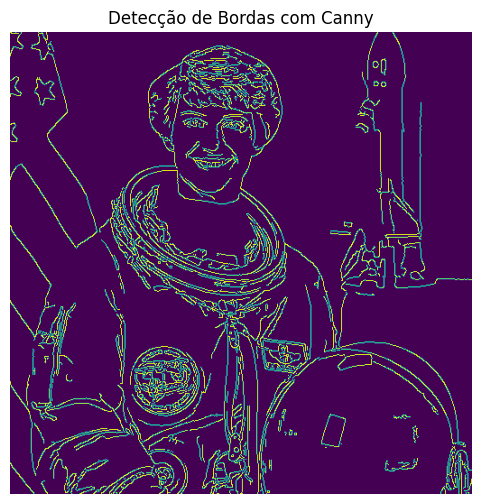

In [9]:
edges = cv2.Canny(gray_image_astronaut, 100, 200)
show_image('Detecção de Bordas com Canny', edges)

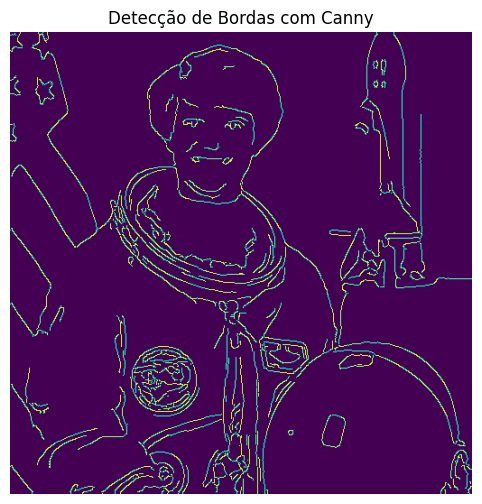

In [10]:
edges = cv2.Canny(blurred_image_astronaut, 100, 200)
show_image('Detecção de Bordas com Canny e Blur', edges)

## Segmentação de imagem: Binarização e Thresholding

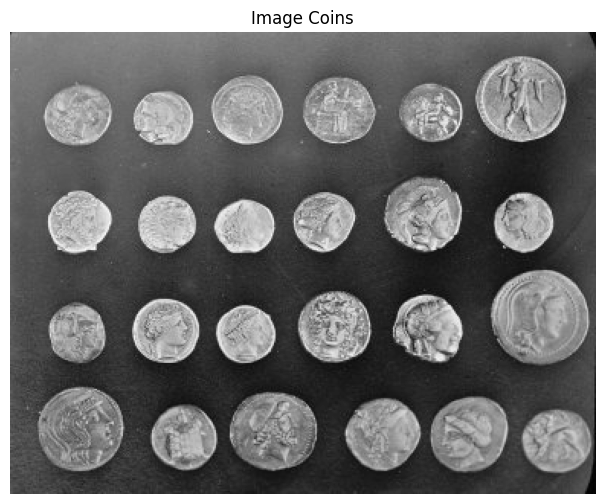

In [11]:
image_coins = skimage.data.coins()
show_image("Image Coins", image_coins, "gray")

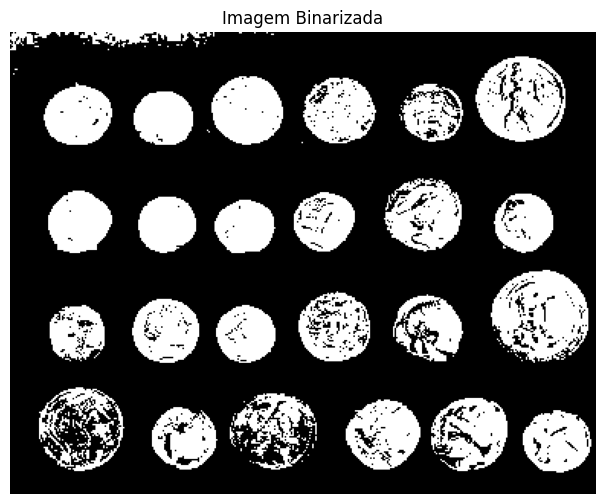

In [12]:
_, binary_image_coins = cv2.threshold(image_coins, 130, 150, cv2.THRESH_BINARY)
show_image('Imagem Binarizada', binary_image_coins, "gray")

## Segmentação de imagem: Baseada em cor (Espaço HSV)

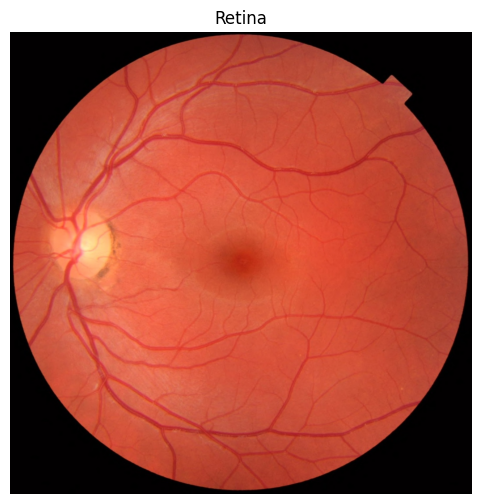

In [13]:
image_retina = skimage.data.retina()
show_image("Retina", image_retina)

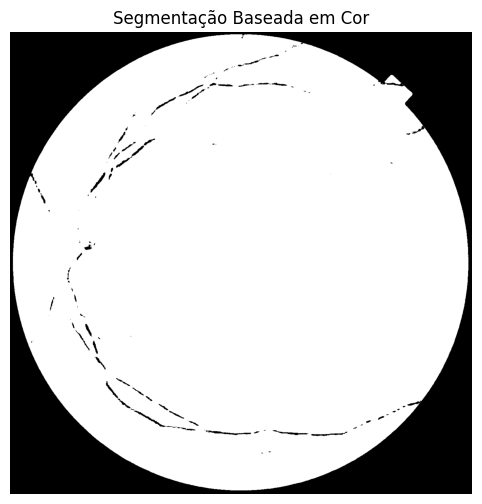

In [19]:
image_retina_hsv = cv2.cvtColor(image_retina, cv2.COLOR_RGB2HSV)
lower_red = np.array([0, 50, 50])
upper_red = np.array([20, 255, 255])
mask_retina = cv2.inRange(image_retina_hsv, lower_red, upper_red)
show_image('Segmentação Baseada em Cor', mask_retina, "gray")